In [1]:
import os # accessing directory structure
import random
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

import cv2
from PIL import Image
import os # accessing directory structure

from skimage import color
from skimage.color import rgb2gray
from skimage import io

import numpy as np
import skimage
from skimage import data # To input standard images
from skimage import io
from matplotlib import pyplot as plt # To plot images
from skimage.color import  rgb2gray# To convery RGB image to grayscale
from skimage import filters
from skimage import feature
import cv2
#---------------------------------------------------------------------------------------------#

OriginalImages = []
DownsampledImages = []
DownsampledImagesTest = []
UpsampledImages = []
labels=[]
lables_test=[]
OriginalImagesTest = []
d=[]
f=[]
y=0

for dirname, _, filenames in os.walk('/kaggle/input/cfpw-dataset/cfp-dataset/Data/Images'):
    y+=1
    i=0
    for filename in filenames:
        i+=1
        d.append(dirname)
        x=dirname
        f.append(filename)
        if(x[-7:]=="frontal"):
            if(i<=3):
                image = os.path.join(dirname, filename)
                OriginalImages.append( os.path.join(dirname, filename))
                labels.append(y)
            elif(i==4):
                image = os.path.join(dirname, filename)
                OriginalImagesTest.append( os.path.join(dirname, filename))
                lables_test.append(y)
                break
        else:
            break
        
print('Total images ', len(OriginalImages))

def displayImage(imagePath):
    image = mpimg.imread(imagePath)
    plt.imshow(image)
    print('Image path', imagePath)
    print('Image size -', image.shape)
    plt.show()

Total images  1500


In [2]:
image_gray=[]
imagetest_gray=[]
image=[]
imagetest=[]

In [3]:
def grayscale_image(imageIndex):
    imagePath = OriginalImages[imageIndex]
    image = cv2.imread( imagePath)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   
    image_gray.append(grayscale.astype('uint8'))

In [4]:
def grayscale_image_test(imageIndex):
    imagePath = OriginalImagesTest[imageIndex]
    image = cv2.imread( imagePath)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imagetest_gray.append(grayscale.astype('uint8'))

In [5]:
def reshape_image(imageIndex):
     
        imagePath = OriginalImages[imageIndex]
        image1 = cv2.imread( imagePath)        
       

        resized = cv2.resize(image1, (256, 256))
    
    
        image.append(resized.astype('uint8'))

In [6]:
def reshape_image_test(imageIndex):
   
      imagePath = OriginalImagesTest[imageIndex]
      image1 = cv2.imread( imagePath)
   
      resized = cv2.resize(image1, (256, 256))
    
    # Append the resized image to the list
      imagetest.append(resized.astype('uint8'))

In [7]:
for i in range(len(OriginalImages)):
    reshape_image(i)
for i in range(len(OriginalImagesTest)):
    reshape_image_test(i)

In [8]:
def Downsample_train(imageIndex):
    
    imagePath = image[imageIndex]
    image1 = imagePath
    m, n ,o= image1.shape
    f = 4
    image2 = np.zeros([m//f + 1, n//f + 1,o])
    
    for i in range(0,m):
        for j in range(0,n):
            for k in range(0,o):
                    image2[i//f, j//f ,k] = image1[i, j,k]
    return image2

In [9]:
def Downsample_test(imageIndex):

    image1 = imagetest[imageIndex]
    m, n ,o = image1.shape

    f = 4
    image2 = np.zeros([m//f + 1, n//f + 1,o])
    
    for i in range(0,m):
        for j in range(0,n):
             for k in range(0,o):
                    image2[i//f, j//f ,k] = image1[i, j,k]
    
    return image2

In [10]:
for i in range(len(image)):
    DownsampledImages.append(Downsample_train(i))

for i in range(len(imagetest)):  
    DownsampledImagesTest.append(Downsample_test(i))

In [11]:
DownsampledImages[0].shape
DownsampledImagesTest[0].shape

(65, 65, 3)

In [12]:
UpsampleImages=[]
UpsampleImagesTest=[]

In [13]:
import keras
from keras.models import Sequential
from keras.layers import UpSampling2D
import matplotlib.pyplot as plt
import numpy as np



# Create the model
model = Sequential()
model.add(UpSampling2D((2, 2),input_shape=(65, 65 , 3) , interpolation='bilinear'))
model.add(UpSampling2D((2, 2),input_shape=(130, 130 , 3) , interpolation='bilinear'))
model.summary()
# model.summary()

for i in range(len(image)) :
# Perform upsampling
          model_inputs = model_inputs = np.array([DownsampledImages[i]])
          outputs_upsampled = model.predict(model_inputs)

# Get output
          output_upsampled = outputs_upsampled[0]
          UpsampleImages.append(output_upsampled)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 130, 130, 3)      0         
 )                                                               
                                                                 
 up_sampling2d_1 (UpSampling  (None, 260, 260, 3)      0         
 2D)                                                             
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 24ms/step


In [14]:
for i in range(len(imagetest)) :
# Perform upsampling
          model_inputs = model_inputs = np.array([DownsampledImagesTest[i]])
          outputs_upsampled = model.predict(model_inputs)

# Get output
          output_upsampled = outputs_upsampled[0]
          UpsampleImagesTest.append(output_upsampled)

1/1 [==============================] - 0s 23ms/step


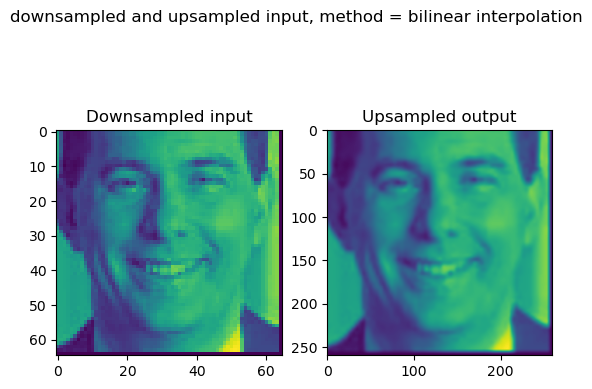

In [15]:
input_image=DownsampledImages[1]


output_upsampled=UpsampleImages[1]
# Visualize input and output
fig, axes = plt.subplots(1, 2)
axes[0].imshow(input_image[:, :, 0]) 
axes[0].set_title('Downsampled input')
axes[1].imshow(output_upsampled[:, :, 0])
axes[1].set_title('Upsampled output')
fig.suptitle(f'downsampled and upsampled input, method = bilinear interpolation')
plt.show()

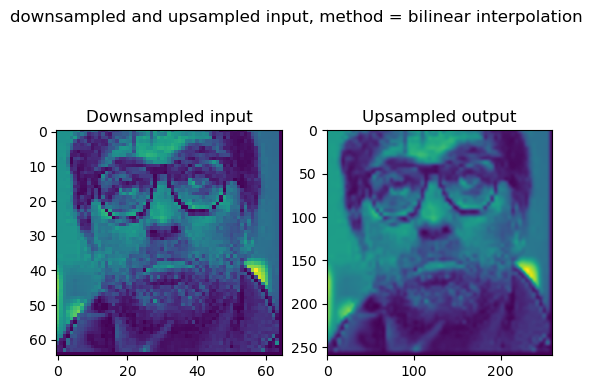

In [16]:
input_image=DownsampledImagesTest[1]


output_upsampled=UpsampleImagesTest[1]
# Visualize input and output
fig, axes = plt.subplots(1, 2)
axes[0].imshow(input_image[:, :, 0]) 
axes[0].set_title('Downsampled input')
axes[1].imshow(output_upsampled[:, :, 0])
axes[1].set_title('Upsampled output')
fig.suptitle(f'downsampled and upsampled input, method = bilinear interpolation')
plt.show()

In [17]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for dlib: filename=dlib-19.24.1-cp37-cp37m-linux_x86_64.whl size=3380593 sha256=e0a1bf0d43674ce8dfb93a1508ef6f0c5c5f51825096df16c90435fa9fc396b5
  Stored in directory: /root/.cache/pip/wheels/be/28/ef/be877f85f9760adadab2a51707ff31c835be8631e38866bad1
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=f9e61f09a4b35fea7284b9118306ffa42e6b9c653bb9581dca3bcc2f50ea2441
  Stored in directory: /root/.cache/pip/wheels/65/cf/0a/4f8e7e42906ede15f4cdf00d6a8f451e4785679155ce17368c
Successfully built dlib face-recognition-models


In [18]:
import face_recognition
import os
from PIL import Image
import cv2
import os
import dlib
# Load the known faces and embeddings
known_faces = []
known_names = []
j=0

for i in range(len(UpsampleImages)):

    image_to_be_matched = UpsampleImages[i]
    rgb_image = cv2.cvtColor(image_to_be_matched, cv2.COLOR_BGR2RGB).astype('uint8')


    if(len(face_recognition.face_encodings(rgb_image))>0):
        encodings = face_recognition.face_encodings(rgb_image)[0]

    # Add the encodings and label to the known_faces and known_names lists
    known_faces.append(encodings)
    known_names.append(labels[i])

print("Known faces:", known_names)

Known faces: [4, 4, 4, 7, 7, 7, 10, 10, 10, 13, 13, 13, 16, 16, 16, 19, 19, 19, 22, 22, 22, 25, 25, 25, 28, 28, 28, 31, 31, 31, 34, 34, 34, 37, 37, 37, 40, 40, 40, 43, 43, 43, 46, 46, 46, 49, 49, 49, 52, 52, 52, 55, 55, 55, 58, 58, 58, 61, 61, 61, 64, 64, 64, 67, 67, 67, 70, 70, 70, 73, 73, 73, 76, 76, 76, 79, 79, 79, 82, 82, 82, 85, 85, 85, 88, 88, 88, 91, 91, 91, 94, 94, 94, 97, 97, 97, 100, 100, 100, 103, 103, 103, 106, 106, 106, 109, 109, 109, 112, 112, 112, 115, 115, 115, 118, 118, 118, 121, 121, 121, 124, 124, 124, 127, 127, 127, 130, 130, 130, 133, 133, 133, 136, 136, 136, 139, 139, 139, 142, 142, 142, 145, 145, 145, 148, 148, 148, 151, 151, 151, 154, 154, 154, 157, 157, 157, 160, 160, 160, 163, 163, 163, 166, 166, 166, 169, 169, 169, 172, 172, 172, 175, 175, 175, 178, 178, 178, 181, 181, 181, 184, 184, 184, 187, 187, 187, 190, 190, 190, 193, 193, 193, 196, 196, 196, 199, 199, 199, 202, 202, 202, 205, 205, 205, 208, 208, 208, 211, 211, 211, 214, 214, 214, 217, 217, 217, 220, 220

In [19]:

unknown_faces = []

j=0

for i in range(len(UpsampleImagesTest)):

    image_to_be_matched1 = UpsampleImagesTest[i]
    rgb_image1 = cv2.cvtColor(image_to_be_matched1, cv2.COLOR_BGR2RGB).astype('uint8')


    if(len(face_recognition.face_encodings(rgb_image1))>0):
        encodings = face_recognition.face_encodings(rgb_image1)[0]

    
    unknown_faces.append(encodings)


for i in range(len(unknown_faces)):
  
    matches = face_recognition.compare_faces(known_faces, unknown_faces[i])
    name = "Unknown"

    
    if True in matches:
        first_match_index = matches.index(True)
        name = known_names[first_match_index]

    print(f"Image {i+1}: {name}")

Image 1: 4
Image 2: 7
Image 3: 10
Image 4: 13
Image 5: 16
Image 6: 19
Image 7: 22
Image 8: 25
Image 9: 28
Image 10: 31
Image 11: 31
Image 12: 37
Image 13: 40
Image 14: 43
Image 15: 46
Image 16: 49
Image 17: 31
Image 18: 31
Image 19: 4
Image 20: 61
Image 21: 64
Image 22: 67
Image 23: 70
Image 24: 64
Image 25: 76
Image 26: 79
Image 27: 82
Image 28: 85
Image 29: 88
Image 30: 91
Image 31: 94
Image 32: 97
Image 33: 100
Image 34: 13
Image 35: 106
Image 36: 109
Image 37: 109
Image 38: 28
Image 39: 103
Image 40: 91
Image 41: 13
Image 42: 127
Image 43: 127
Image 44: 133
Image 45: 136
Image 46: 139
Image 47: 142
Image 48: 145
Image 49: 64
Image 50: 58
Image 51: 37
Image 52: 157
Image 53: 160
Image 54: 100
Image 55: 166
Image 56: 25
Image 57: 172
Image 58: 145
Image 59: 178
Image 60: 133
Image 61: 28
Image 62: 187
Image 63: 22
Image 64: 58
Image 65: 13
Image 66: 199
Image 67: 181
Image 68: 40
Image 69: 139
Image 70: 211
Image 71: 214
Image 72: 46
Image 73: 220
Image 74: 223
Image 75: 226
Image 76

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


clf = LogisticRegression(random_state=42)
clf.fit(known_faces, known_names)
predicted_labels = clf.predict(unknown_faces)

accuracy = accuracy_score(lables_test, predicted_labels)
precision = precision_score(lables_test, predicted_labels, average='weighted',zero_division=1)
recall = recall_score(lables_test, predicted_labels, average='weighted')
f1 = f1_score(lables_test, predicted_labels, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.926
Precision: 0.9636666666666667
Recall: 0.926
F1 Score: 0.904


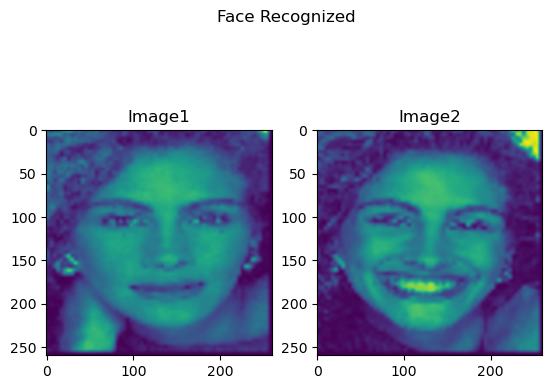

In [21]:
# Visualize input and output
fig, axes = plt.subplots(1, 2)
axes[0].imshow((UpsampleImages[1499])[:, :, 0]) 
axes[0].set_title('Image1')
axes[1].imshow((UpsampleImagesTest[499])[:, :, 0])
axes[1].set_title('Image2')
fig.suptitle(f'Face Recognized')
plt.show()

In [22]:
unknown_faces = []

j=0

for i in range(len(DownsampledImagesTest)):

    image_to_be_matched1 = DownsampledImagesTest[i]
    image_to_be_matched1 = cv2.convertScaleAbs(image_to_be_matched1)
    rgb_image1 = cv2.cvtColor(image_to_be_matched1, cv2.COLOR_BGR2RGB).astype('uint8')


    if(len(face_recognition.face_encodings(rgb_image1))>0):
        encodings = face_recognition.face_encodings(rgb_image1)[0]

    
    unknown_faces.append(encodings)


for i in range(len(unknown_faces)):
  
    matches = face_recognition.compare_faces(known_faces, unknown_faces[i])
    name = "Unknown"

    
    if True in matches:
        first_match_index = matches.index(True)
        name = known_names[first_match_index]

    print(f"Image {i+1}: {name}")

Image 1: 4
Image 2: 7
Image 3: 10
Image 4: 13
Image 5: 16
Image 6: 19
Image 7: 22
Image 8: 25
Image 9: 28
Image 10: 31
Image 11: 34
Image 12: 37
Image 13: 40
Image 14: 43
Image 15: 46
Image 16: 49
Image 17: 31
Image 18: 31
Image 19: 4
Image 20: 61
Image 21: 64
Image 22: 67
Image 23: 70
Image 24: 64
Image 25: 76
Image 26: 79
Image 27: 82
Image 28: 85
Image 29: 88
Image 30: 91
Image 31: 94
Image 32: 97
Image 33: 100
Image 34: 13
Image 35: 106
Image 36: 109
Image 37: 109
Image 38: 28
Image 39: 103
Image 40: 91
Image 41: 25
Image 42: 127
Image 43: 130
Image 44: 133
Image 45: 136
Image 46: 25
Image 47: 142
Image 48: 145
Image 49: 148
Image 50: 58
Image 51: 37
Image 52: 157
Image 53: 160
Image 54: 100
Image 55: 166
Image 56: 25
Image 57: 172
Image 58: 145
Image 59: 178
Image 60: 133
Image 61: 28
Image 62: 187
Image 63: 22
Image 64: 58
Image 65: 13
Image 66: 199
Image 67: 181
Image 68: 40
Image 69: 139
Image 70: 211
Image 71: 214
Image 72: 217
Image 73: 220
Image 74: 25
Image 75: 226
Image 76

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


clf = LogisticRegression(random_state=42)
clf.fit(known_faces, known_names)

predicted_labels = clf.predict(unknown_faces)

accuracy = accuracy_score(lables_test, predicted_labels)
precision = precision_score(lables_test, predicted_labels, average='weighted',zero_division=1)
recall = recall_score(lables_test, predicted_labels, average='weighted')
f1 = f1_score(lables_test, predicted_labels, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.922
Precision: 0.9625
Recall: 0.922
F1 Score: 0.9004666666666667


In [24]:
unknown_faces = []

j=0

for i in range(len(DownsampledImagesTest)):

    image_to_be_matched1 = DownsampledImagesTest[i]
    image_to_be_matched1= cv2.GaussianBlur(image_to_be_matched1, (5,5), 3)
    image_to_be_matched1 = cv2.convertScaleAbs(image_to_be_matched1)
    rgb_image1 = cv2.cvtColor(image_to_be_matched1, cv2.COLOR_BGR2RGB).astype('uint8')


    if(len(face_recognition.face_encodings(rgb_image1))>0):
        encodings = face_recognition.face_encodings(rgb_image1)[0]

    
    unknown_faces.append(encodings)


for i in range(len(unknown_faces)):
  
    matches = face_recognition.compare_faces(known_faces, unknown_faces[i])
    name = "Unknown"

    
    if True in matches:
        first_match_index = matches.index(True)
        name = known_names[first_match_index]

    print(f"Image {i+1}: {name}")
    
clf = LogisticRegression(random_state=42)
clf.fit(known_faces, known_names)  
predicted_labels = clf.predict(unknown_faces)

accuracy = accuracy_score(lables_test, predicted_labels)
precision = precision_score(lables_test, predicted_labels, average='weighted',zero_division=1)
recall = recall_score(lables_test, predicted_labels, average='weighted')
f1 = f1_score(lables_test, predicted_labels, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Image 1: 4
Image 2: 7
Image 3: 10
Image 4: 13
Image 5: 16
Image 6: 16
Image 7: 22
Image 8: 22
Image 9: 28
Image 10: 31
Image 11: 31
Image 12: 31
Image 13: 40
Image 14: 43
Image 15: 46
Image 16: 4
Image 17: 31
Image 18: 4
Image 19: 31
Image 20: 16
Image 21: 64
Image 22: 67
Image 23: 16
Image 24: 64
Image 25: 76
Image 26: 79
Image 27: 82
Image 28: 82
Image 29: 88
Image 30: 88
Image 31: 94
Image 32: 94
Image 33: 43
Image 34: 43
Image 35: 43
Image 36: 43
Image 37: 43
Image 38: 28
Image 39: 25
Image 40: 25
Image 41: 25
Image 42: 127
Image 43: 127
Image 44: 133
Image 45: 136
Image 46: 139
Image 47: 142
Image 48: 49
Image 49: 64
Image 50: 109
Image 51: 109
Image 52: 157
Image 53: 49
Image 54: 100
Image 55: 166
Image 56: 25
Image 57: 94
Image 58: 175
Image 59: 175
Image 60: 133
Image 61: 28
Image 62: 133
Image 63: 181
Image 64: 181
Image 65: 13
Image 66: 298
Image 67: 172
Image 68: 112
Image 69: 112
Image 70: 139
Image 71: 67
Image 72: 67
Image 73: 67
Image 74: 67
Image 75: 226
Image 76: 226
I